In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from carbo import*





# Data visualitation

In [2]:
df = pd.read_csv('car_sales.csv')
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [3]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
99181,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,volkswagen
99182,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,volkswagen
99183,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,volkswagen
99184,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,volkswagen


First of all, let's take a look into the dataset. Each car is defined by 10 features. `price`  in £. `transmission`is the type of transmission of the car. `mileage`is indicated is the distance distance used in miles. `mpg`stand for miles per gallon of fuel. `engineSize`, size in liters. `tax`is the road tax for the car. Since all the car listing here are cars from UK, the tax is the tax from UK.

The goal is to get the representation of:

- **1 :** mpg per car brand. Does some brands uses more fuel than others?
- **2 :** Price per car brand. There are brands that are more expensive than others, but, how much?
- **3 :** Sales per brand.
- **4 :** Top 10 most selled cars
- **5 :** Price per year
- **6 :** Mpg per brand

In [4]:
box_mpg = df[df['mpg']<300]

<Figure size 432x288 with 0 Axes>

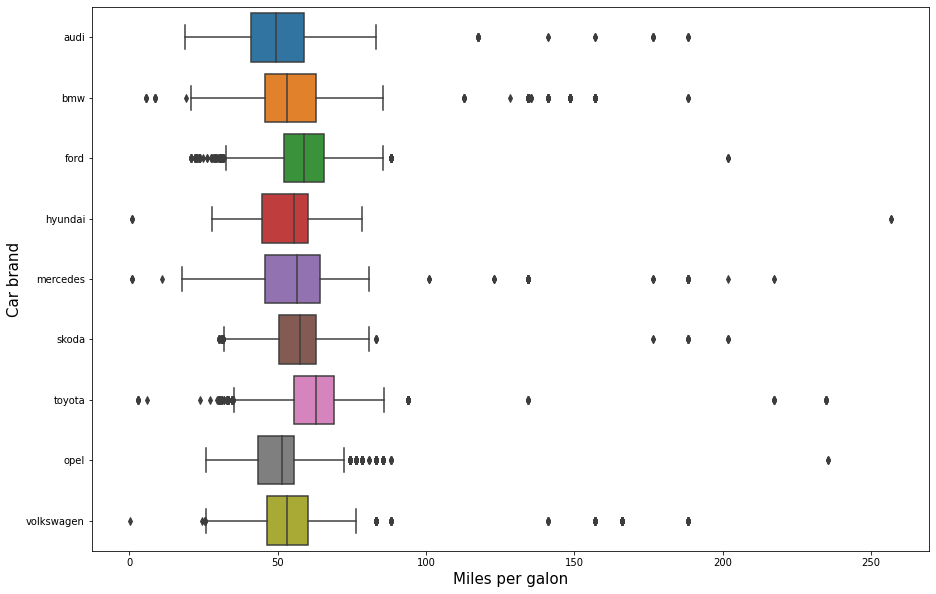

In [5]:
fig = plt.figure()
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
sns.boxplot(data=box_mpg, x="mpg", y="car_brand")
ax.set_ylabel('Car brand', fontsize=15);
ax.set_xlabel('Miles per galon', fontsize=15);

We can't clearly state that there are brands that use more fuel than others. The differences are not that high.

In [6]:
box_price = df

In [7]:
list_car_brands = df['car_brand'].unique()
list_car_brands

array(['audi', 'bmw', 'ford', 'hyundai', 'mercedes', 'skoda', 'toyota',
       'opel', 'volkswagen'], dtype=object)

In [8]:
df[df['car_brand']=='bmw']['price']

10668    11200
10669    27000
10670    16000
10671    12750
10672    14500
         ...  
21444    19000
21445    14600
21446    13100
21447     9930
21448    15981
Name: price, Length: 10781, dtype: int64

In [9]:
data = df[df['price']<50000]

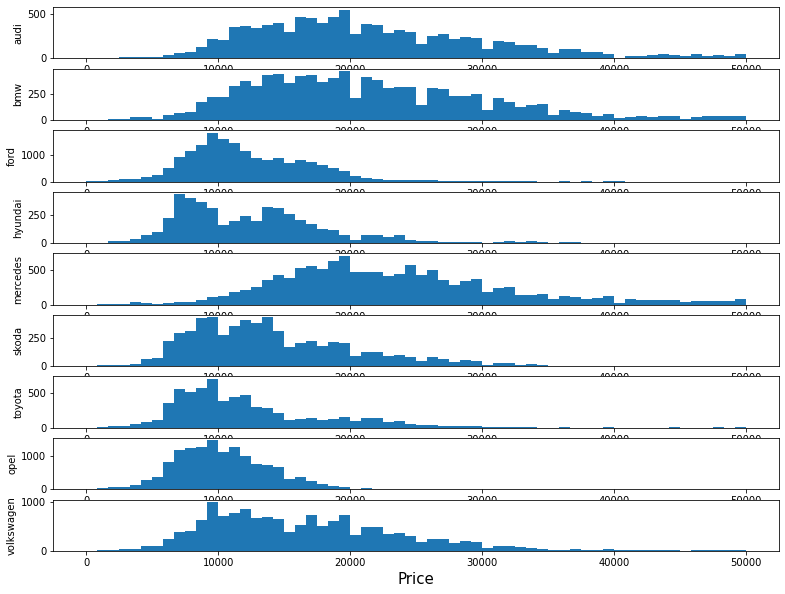

In [10]:
car_brands = data['car_brand'].unique()
n_axes = len(car_brands)

fig, axs = plt.subplots(n_axes, 1)
fig.set_figheight(10)
fig.set_figwidth(13)


i = 0
for brand in car_brands:
    axs[i].set_ylabel(brand, fontsize=10);
    
    axs[i].hist(data[data['car_brand']==brand]['price'],bins = 60,histtype='stepfilled',range=[0,50000])
    i = i+1

axs[i-1].set_xlabel('Price',fontsize = 15);



<Figure size 432x288 with 0 Axes>

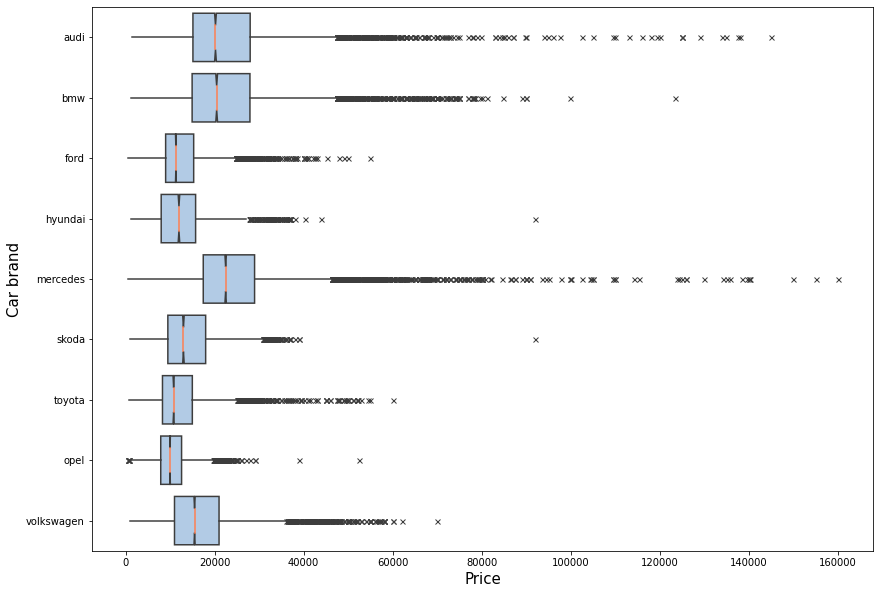

In [11]:

fig = plt.figure()
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)
sns.boxplot(data=box_price, x="price", y="car_brand",notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
ax.set_ylabel('Car brand', fontsize=15);
ax.set_xlabel('Price', fontsize=15);

Two conclusions can be drawn from this plot: 

1.-Some car brands are more expensive than others. 

2.-Some car brands offer a wider variety of prices than others.

For example, Skoda, Opel, and Hyundai seem to offer all the types of models within a certain price range. However, Mercedes, BMW, and Audi, for example, have a lot of outliers, which means that, while the majority of their cars are priced in a certain range, they also have a lot of more expensive models. 

Let's get the top 10 most selled cars

In [12]:
sell_cars = df.groupby('model').count().sort_values(by = 'year',ascending = False)
print(sell_cars)

top_20_sell_cars = sell_cars.iloc[0:20,0].to_frame().reset_index()

          year  price  transmission  mileage  fuelType   tax   mpg  \
model                                                                
 Fiesta   6556   6556          6556     6556      6556  6556  6556   
 Golf     4863   4863          4863     4863      4863  4863  4863   
 Focus    4588   4588          4588     4588      4588  4588  4588   
 C Class  3747   3747          3747     3747      3747  3747  3747   
 Corsa    3441   3441          3441     3441      3441  3441  3441   
...        ...    ...           ...      ...       ...   ...   ...   
 A2          1      1             1        1         1     1     1   
180          1      1             1        1         1     1     1   
200          1      1             1        1         1     1     1   
220          1      1             1        1         1     1     1   
230          1      1             1        1         1     1     1   

          engineSize  car_brand  
model                            
 Fiesta         6556 

In [13]:
top_20_sell_cars.head(20)

,model,year
0,Fiesta,6556
1,Golf,4863
2,Focus,4588
3,C Class,3747
4,Corsa,3441
5,Polo,3287
6,Astra,2805
7,A Class,2561
8,3 Series,2443
9,Kuga,2225


<Figure size 432x288 with 0 Axes>

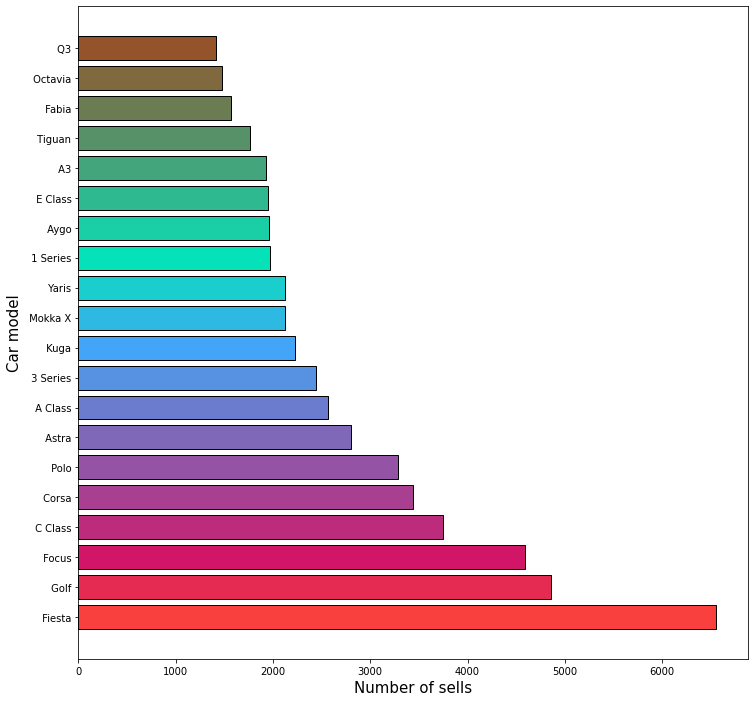

In [14]:
neighborhood_colors = create_colors(250/255,63/255,63/255,len(top_20_sell_cars),0.08);
fig = plt.figure();  # an empty figure with no Axes
fig, ax = plt.subplots();  # a figure with a single Axes
fig.set_figheight(12);
fig.set_figwidth(12);
    
plt.barh(y = top_20_sell_cars['model'],  width = top_20_sell_cars['year'],color=neighborhood_colors,edgecolor = 'black');
ax.set_xlabel('Number of sells', fontsize=15);
ax.set_ylabel('Car model', fontsize=15);

In [15]:
#Vamos a comparar el número de ventas con el precio de los coches

In [16]:
mean_price_best_sellers = {'model':[],
                     'mean_price':[]}



for car in top_20_sell_cars['model']:
    mean_price = df[df['model']==car]['price'].mean()
    
    mean_price_best_sellers['model'].append(car)
        
    
    mean_price_best_sellers['mean_price'].append(int(mean_price))
    
mean_price_best_sellers_df = pd.DataFrame(mean_price_best_sellers)
print(mean_price_best_sellers_df)

        model  mean_price
0      Fiesta       10196
1        Golf       16689
2       Focus       13185
3     C Class       23695
4       Corsa        8342
5        Polo       11341
6       Astra       10471
7     A Class       19849
8    3 Series       19880
9        Kuga       15823
10    Mokka X       12497
11      Yaris       10553
12   1 Series       15821
13       Aygo        7905
14    E Class       25481
15         A3       17408
16     Tiguan       21644
17      Fabia        9906
18    Octavia       13991
19         Q3       22999


<Figure size 432x288 with 0 Axes>

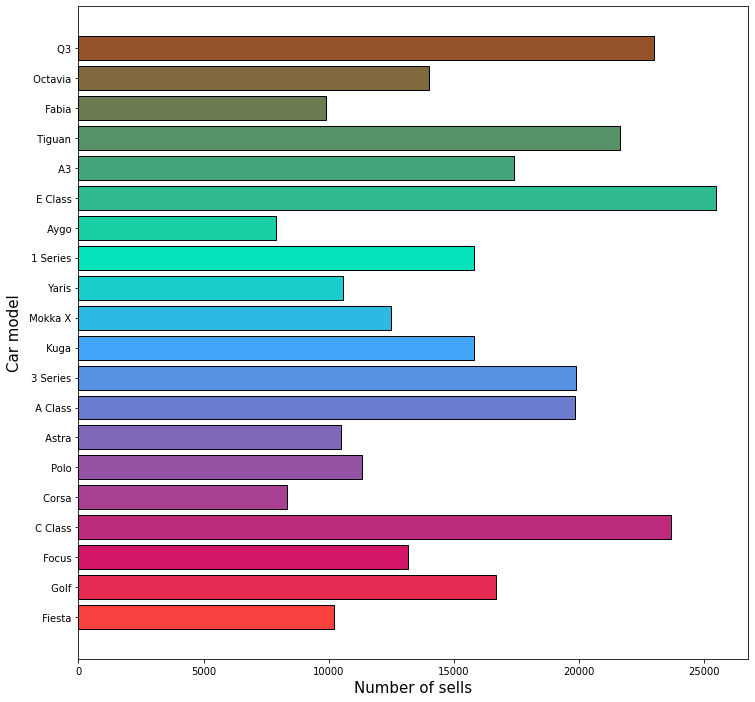

In [17]:
neighborhood_colors = create_colors(250/255,63/255,63/255,len(top_20_sell_cars),0.08);
fig = plt.figure();  # an empty figure with no Axes
fig, ax = plt.subplots();  # a figure with a single Axes
fig.set_figheight(12);
fig.set_figwidth(12);
    
plt.barh(y = mean_price_best_sellers_df['model'],  width = mean_price_best_sellers_df['mean_price'],color=neighborhood_colors,edgecolor = 'black');
ax.set_xlabel('Number of sells', fontsize=15);
ax.set_ylabel('Car model', fontsize=15);

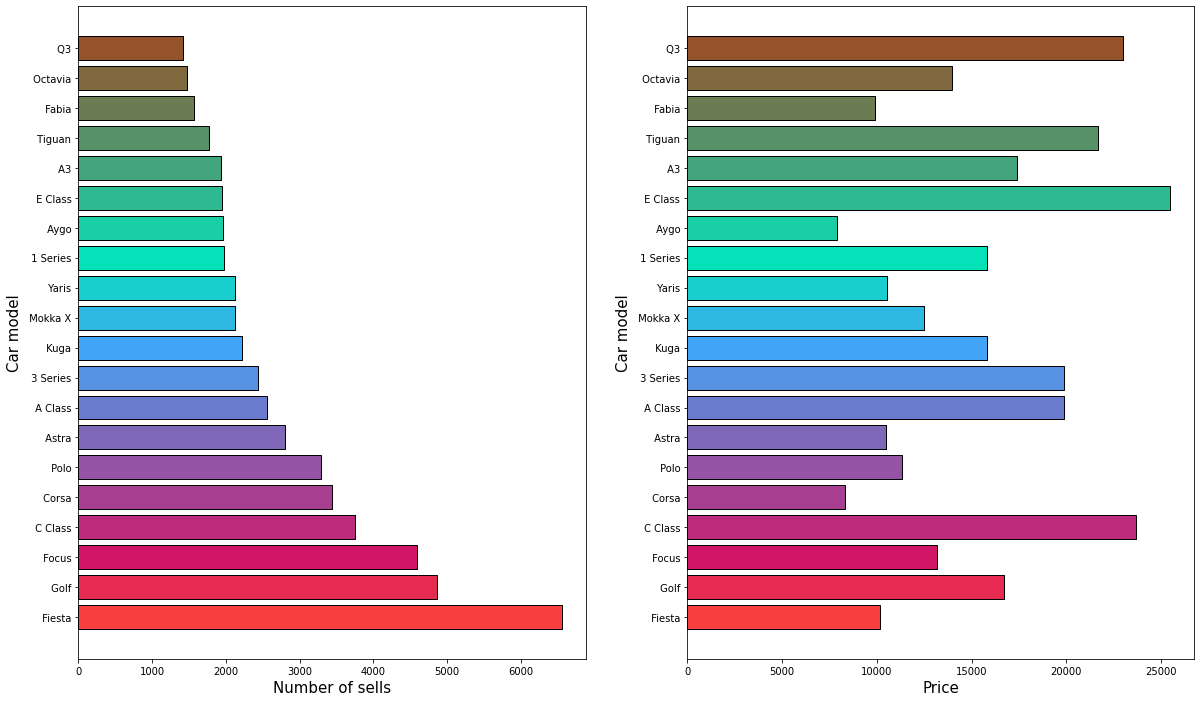

In [18]:
neighborhood_colors_1 = create_colors(250/255,63/255,63/255,len(top_20_sell_cars),0.08);
fig, axs = plt.subplots(1, 2) # an empty figure with no Axes
fig.set_figheight(12);
fig.set_figwidth(20);
    
axs[0].barh(y = top_20_sell_cars['model'],  width = top_20_sell_cars['year'],color=neighborhood_colors_1,edgecolor = 'black');
axs[0].set_xlabel('Number of sells', fontsize=15);
axs[0].set_ylabel('Car model', fontsize=15);

axs[1].barh(y = mean_price_best_sellers_df['model'],  width = mean_price_best_sellers_df['mean_price'],color=neighborhood_colors,edgecolor = 'black');
axs[1].set_xlabel('Price', fontsize=15);
axs[1].set_ylabel('Car model', fontsize=15);


On the left hand side, we have the top 10 most sold cars in the listing. Small cars like the Fiesta, Golf, and Focus seem to be the favorites.
On the right hand side, I have represented the prices of these cars. We can clearly see that being a cheap car is not directly proportional to being a top seller. The top 10 most sold cars offer a lot of variety in the price range.

In [19]:
mean_price_models = {'model':[],
                     'mean_price':[]}

In [20]:
model_cars = df['model'].unique()

for car in model_cars:
    mean_price = df[df['model']==car]['price'].mean()
    
    mean_price_models['model'].append(car)
        
    
    mean_price_models['mean_price'].append(int(mean_price))
    
mean_price_df = pd.DataFrame(mean_price_models)
print(mean_price_df)

           model  mean_price
0             A1       14327
1             A6       22695
2             A4       20255
3             A3       17408
4             Q3       22999
..           ...         ...
190   Caddy Life       17432
191        Caddy       12844
192   Caddy Maxi       11472
193          Eos        6616
194          Fox        1733

[195 rows x 2 columns]


In [21]:
top_20_cheapest_cars = mean_price_df.sort_values(by='mean_price',ascending = True).iloc[0:20,:]
print(top_20_cheapest_cars)

              model  mean_price
85           Accent        1295
167          Vectra        1608
194             Fox        1733
88            Amica        1750
70         Streetka        1924
87             Getz        1927
166           Tigra        2429
24               A2        2490
68           Fusion        2555
71           Escort        3000
111             CLK        3077
86         Terracan        3092
165           Agila        4085
144              IQ        4247
113             230        4500
145   Urban Cruiser        4617
64               KA        5186
126        Roomster        5407
102       CLC Class        5516
143         Verso-S        5746


<Figure size 432x288 with 0 Axes>

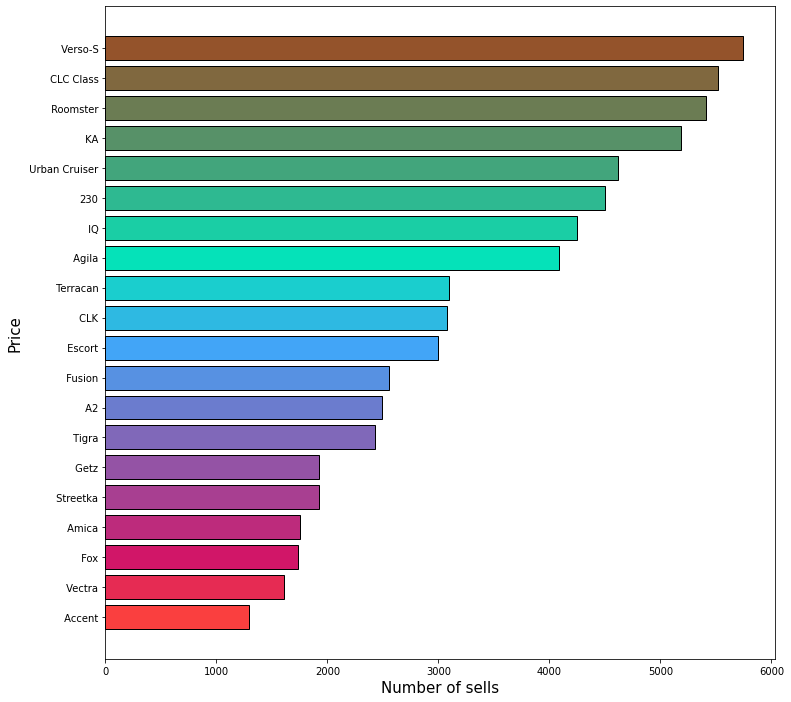

In [22]:
neighborhood_colors = create_colors(250/255,63/255,63/255,len(top_20_cheapest_cars),0.08);
fig = plt.figure();  # an empty figure with no Axes
fig, ax = plt.subplots();  # a figure with a single Axes
fig.set_figheight(12);
fig.set_figwidth(12);
    
plt.barh(y = top_20_cheapest_cars['model'],  width = top_20_cheapest_cars['mean_price'],color=neighborhood_colors,edgecolor = 'black');
ax.set_xlabel('Number of sells', fontsize=15);
ax.set_ylabel('Price', fontsize=15);

In [23]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'car_brand'],
      dtype='object')

In [24]:
price_year = df.drop(columns = ['model','transmission','mileage','fuelType','tax','mpg','car_brand','engineSize'])

In [25]:
price_year.head()

,year,price
0,2017,12500
1,2016,16500
2,2016,11000
3,2017,16800
4,2019,17300


In [26]:
df[df['year']<1980]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_brand
56345,M Class,1970,24999,Automatic,14000,Diesel,305,39.2,0.0,mercedes
81234,Zafira,1970,10495,Manual,37357,Petrol,200,42.2,1.4,opel


<AxesSubplot:xlabel='year', ylabel='price'>

<Figure size 432x288 with 0 Axes>

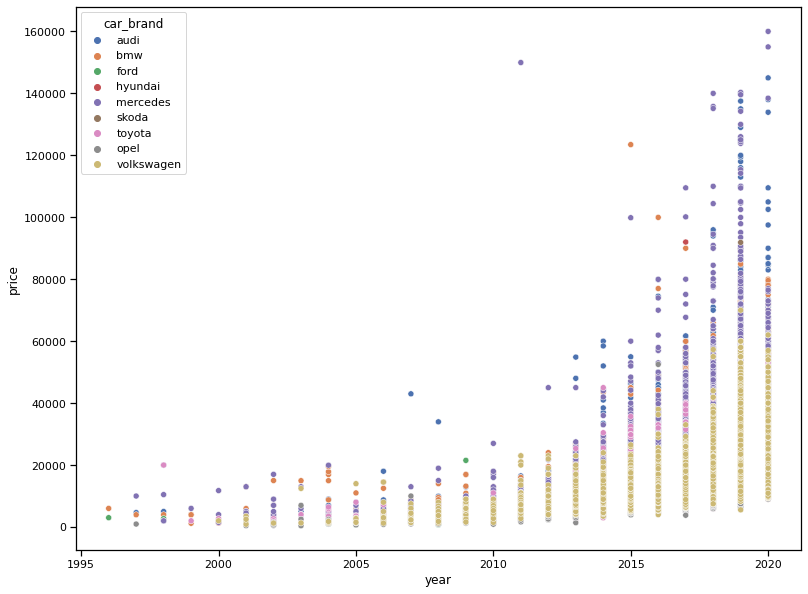

In [27]:
sns.set_context("notebook")
fig = plt.figure()
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(13)
sns.scatterplot(data=df[df['year']>1990], x="year", y="price",hue="car_brand", palette="deep")
#ax.set_ylabel('Price', fontsize=15);
#ax.set_xlabel('Car Year', fontsize=15);

It's obvious that newer cars are going to be more expensive. This can be clearly seen in the scatter plot above. However, there is an interesting observation about this plot.


The price of the car will decrease a **lot** in the first 5-7 years. Then, it becomes more stable. This is what happens in the real world.


<Figure size 432x288 with 0 Axes>

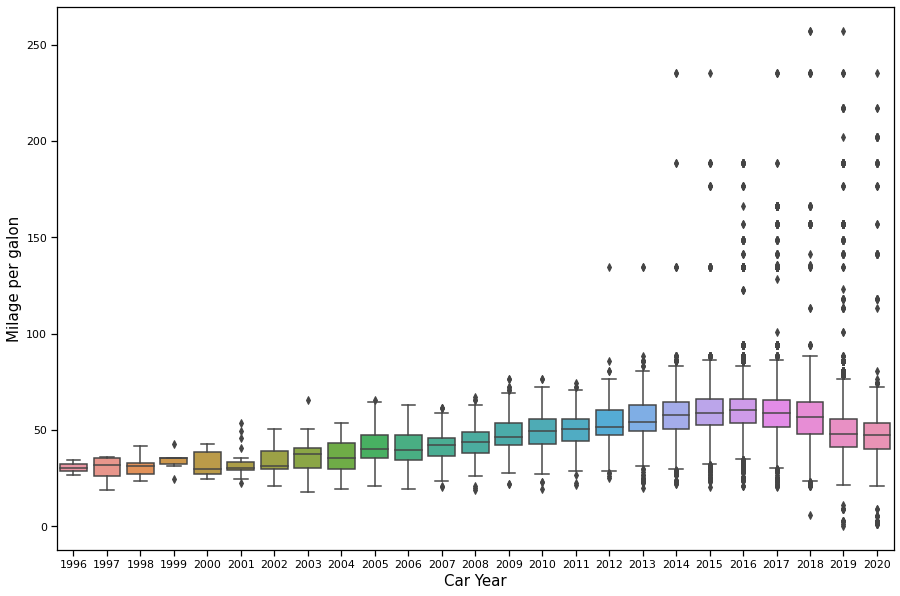

In [28]:
sns.set_context("notebook")
fig = plt.figure()
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
sns.boxplot(data=df[(df['year']>1990) & ( df['mpg']<300)], x="year", y="mpg")
ax.set_ylabel('Milage per galon', fontsize=15);
ax.set_xlabel('Car Year', fontsize=15);

Since the world is working to become more eco-friendly every year, I wanted to see if this is true in the automotive world too.
We can clearly see that the miles per gallon that cars use has increased over the years, but, with the exception of the last few years, we can clearly see a decrease.

